# Unsupervised Learning

Input is a table X with N columns but no target column y.

* **Clustering: output is a category (multiple)**
* **Anomaly Detection: output is a binary category 0|1**
* **PCA: output is table with M columns, M <= N**
* **Recommenders: table has lots of empty values, fill them**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../data/penguins_simple.csv', sep=';')

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

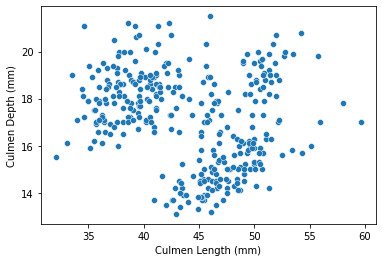

In [3]:
sns.scatterplot(data=df, x='Culmen Length (mm)', y='Culmen Depth (mm)')

In [4]:
train, test = train_test_split(df, random_state=777)
train.shape, test.shape

((249, 6), (84, 6))

### K-Means Clustering

* clusters are spherical
* all clusters have the same size
* every cluster has a center point
* you set the number of clusters before

In [5]:
# data must be scaled to 0.0 .. 1.0
col = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='error', drop='first'), ['Species', 'Sex']),
    ('scale', MinMaxScaler(), ['Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)'])
])

In [6]:
col.fit(train)
Xt = col.transform(train)
Xt.shape  # we try to find 7-dimensional balls in our data

(249, 7)

In [14]:
km = KMeans(n_clusters=6) # <-- number of clusters
km.fit(Xt)
#km.cluster_centers_

KMeans(n_clusters=6)

In [15]:
clusters = km.predict(Xt)

In [16]:
clusters

array([2, 4, 3, 0, 1, 1, 3, 5, 2, 2, 1, 1, 0, 1, 4, 4, 4, 3, 3, 2, 2, 4,
       3, 5, 5, 2, 0, 0, 3, 4, 2, 1, 5, 3, 3, 3, 4, 5, 5, 0, 0, 4, 0, 1,
       4, 3, 4, 0, 0, 3, 2, 5, 3, 5, 3, 2, 5, 4, 0, 3, 5, 1, 4, 5, 1, 4,
       4, 5, 1, 0, 4, 1, 2, 0, 3, 1, 0, 0, 3, 3, 0, 1, 0, 3, 4, 1, 4, 1,
       0, 1, 0, 0, 4, 1, 4, 2, 4, 4, 5, 4, 3, 0, 5, 4, 4, 5, 2, 2, 1, 1,
       4, 4, 3, 1, 4, 3, 2, 0, 1, 0, 0, 4, 5, 2, 5, 1, 2, 5, 0, 0, 3, 2,
       3, 3, 4, 3, 4, 1, 4, 0, 0, 3, 0, 0, 2, 3, 3, 4, 0, 0, 3, 3, 5, 2,
       3, 2, 1, 1, 1, 0, 3, 0, 2, 1, 5, 3, 4, 1, 4, 4, 4, 1, 3, 5, 1, 3,
       4, 1, 1, 4, 4, 4, 1, 3, 2, 1, 2, 1, 2, 1, 0, 4, 3, 0, 4, 3, 2, 0,
       5, 1, 3, 1, 1, 1, 3, 4, 0, 0, 0, 0, 4, 3, 1, 4, 1, 1, 5, 3, 1, 0,
       1, 4, 5, 0, 4, 3, 4, 2, 3, 4, 4, 0, 2, 1, 1, 3, 4, 4, 0, 3, 3, 4,
       1, 5, 1, 1, 1, 0, 1], dtype=int32)

In [17]:
train = train.copy()
train['cluster'] = clusters

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

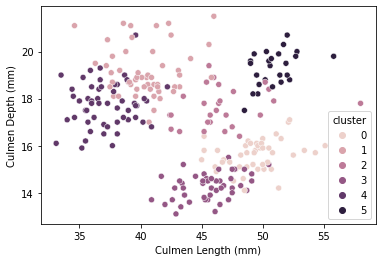

In [18]:
sns.scatterplot(data=train, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='cluster')

#### Caveat:

* clustering with Euclidean distance does not work well with many features

### Evaluation metrics
* silhouette score: describes the overall shape of the cluster (penalizes large surface)
* compare to a reference set (e.g. Species)
* calculate clusters for different hyperparameters and compare some metric

### DBSCAN clustering

* you get the number of clusters as a result
* two hyperparameters: 
  * minimum # points belonging to a cluster
  * maximum distance for two points in the same cluster (eps)
* finds outliers (-1)

In [19]:
from sklearn.cluster import DBSCAN

In [40]:
# clusters with 5+ data points that are max. 0.13 units apart
m = DBSCAN(eps=0.8, min_samples=1, metric='euclidean')
m.fit(Xt)
train['dbscan'] = m.fit_predict(Xt)

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

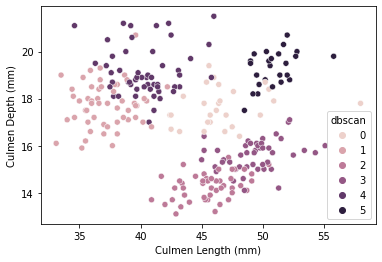

In [41]:
sns.scatterplot(data=train, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='dbscan')

### Distance Metrics:

* euclidean : works well only <10 features
* manhattan : works well only <10 features
* cosine similarity : angle between two vectors, good for large number of features
* Jaccard distance / Tanimoto score : for large numbers of binary columns

----

## Principal Component Analysis (PCA)

PCA tries to find the most important features in your data.
Most important = highest variance.

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<AxesSubplot:>

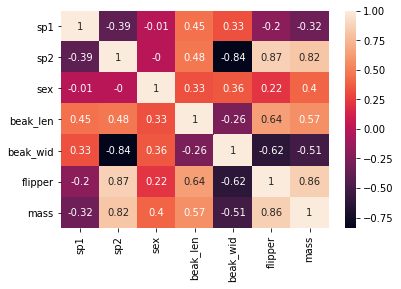

In [43]:
# we measure statistical dependence of features with correlation coefficients
# 1.0 = identical, 0.0 = independent, -1.0 inverse
sns.heatmap(pd.DataFrame(Xt,
                         columns=['sp1', 'sp2', 'sex', 'beak_len', 'beak_wid', 'flipper', 'mass']
                        ).corr().round(2), annot=True)

In [44]:
# we need to have a mean of zero for PCA
sc = StandardScaler()
Xs = sc.fit_transform(Xt)

In [50]:
pca = PCA(n_components=3)
Xp = pca.fit_transform(Xs)
Xp.shape

(249, 3)

PCA performs a linear transformation. All the features get transformed into new features.

<AxesSubplot:>

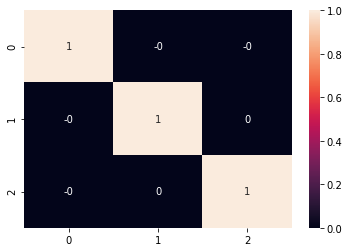

In [51]:
# the output data of the PCA are *orthogonal* or *independent* features
# --> super important for linear models
sns.heatmap(pd.DataFrame(Xp).corr().round(2), annot=True)

the output features of the PCA are *ranked* : the first feature is the most important one, the second feature is the second is the second most important etc.

In [52]:
# we can use only the most representative features -> Dimensionality Reduction
# --> models can be trained faster
# --> we avoid overfitting

## Disadvantage: we don't know what the new features after PCA mean (no labels)

<AxesSubplot:>

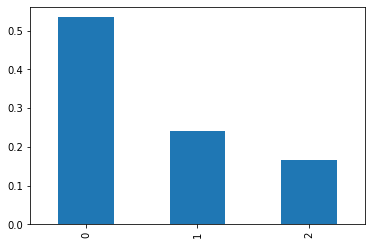

In [53]:
# how many components to use?
pd.Series(pca.explained_variance_ratio_).plot.bar()
# first new feature explains 50% of the variance in the data
# second new feature explains 25% of the variance
# features 3-6 only explain noise, we can remove them

### What to use PCA for?

* use the output as an input for further supervised modeling (as a preprocessing step)
* use the output for plotting / clustering to explore the shape

In [ ]:
sns.scatterplot(data=pd.DataFrame(Xp), x=0, y=1, hue=train['Sex'])

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

### Clean Pipeline

In [55]:
col = ColumnTransformer([
    # check Andreas Müllers scikit videos on this
    # for how to write your own preprocessors
    ('onehot', OneHotEncoder(handle_unknown='error', drop='first'), ['Species', 'Sex']),
    ('scale', 'passthrough', ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)'])
])

In [56]:
pipeline = make_pipeline(
    col,                  # replace sex and species by 0 and 1
    StandardScaler(),     # scale to mean of 0.0
    PCA(n_components=3),  # use only the 3 most important transformed columns
    LinearRegression()    # train a model
)

In [57]:
# regression: predict the body mass
Xtrain = train.iloc[:, :-2]
ytrain = train['Body Mass (g)']

pipeline.fit(Xtrain, ytrain)
ypred_train = pipeline.predict(Xtrain)

In [58]:
pipeline.score(Xtrain, ytrain)

0.8554563902785519